In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
df2=pd.read_csv('combined_reviews.csv',low_memory=False)
print(df2.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'app_id'],
      dtype='object')


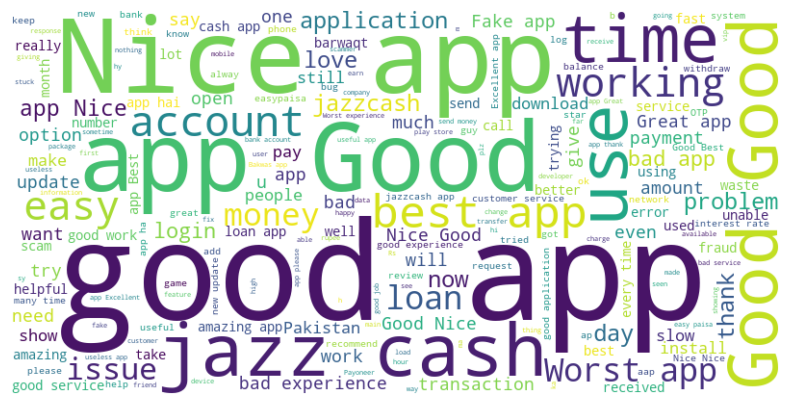

In [3]:
df2['content'] = df2['content'].fillna('').astype(str)

text = ' '.join(review for review in df2['content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.show()


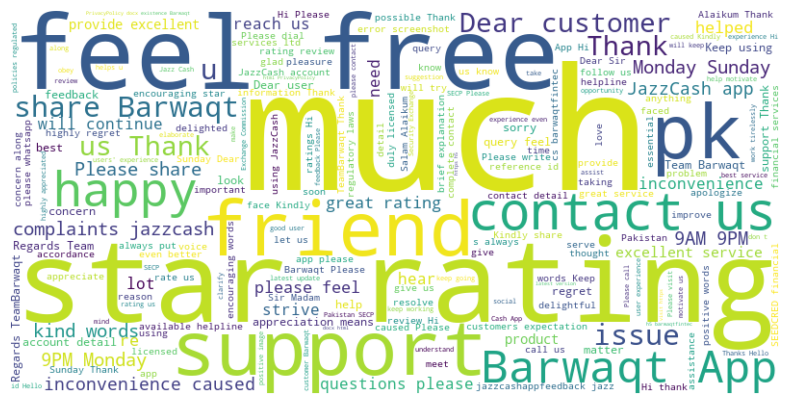

In [4]:
df2['replyContent'] = df2['replyContent'].fillna('').astype(str)

text = ' '.join(review for review in df2['replyContent'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

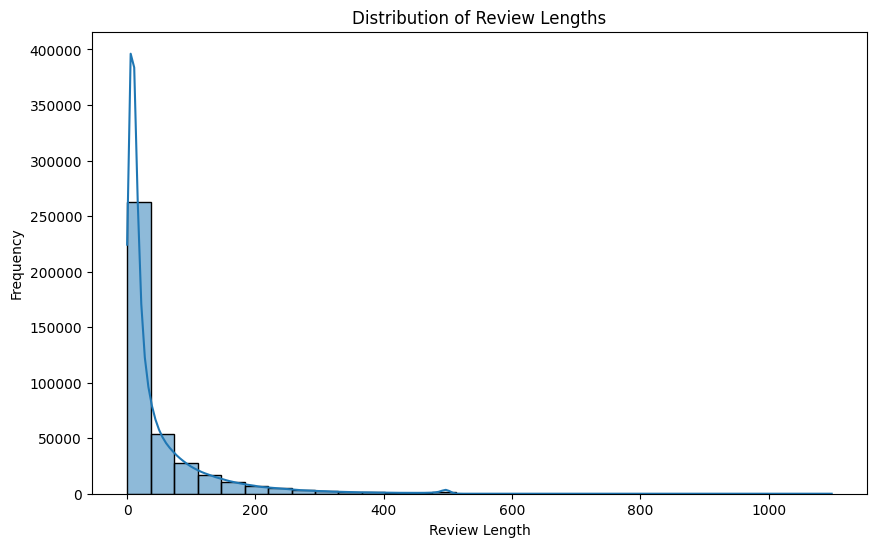

In [5]:
# Plot the distribution of review lengths
df2['review_length'] = df2['content'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df2['review_length'], kde=True, bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

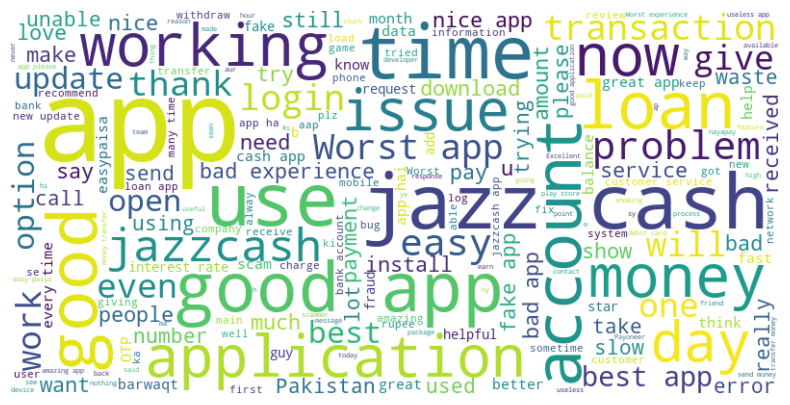

In [6]:
# Filter reviews with fewer than 20 characters
filtered_df = df2[df2['review_length'] > 20]

# Combine all the filtered review texts into a single string
filtered_text = ' '.join(review for review in filtered_df['content'])
# Generate the word cloud for the filtered reviews
filtered_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(filtered_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [31]:
org_df=pd.read_excel("AppData.xlsx")
org_df.columns
app_name_mapping = dict(zip(org_df['Package_Name'], org_df['Application Name']))
df2['Application Name'] = df2['app_id'].map(app_name_mapping)
print(df2[['Application Name',]])


Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'app_id', 'review_length',
       'Application Name'],
      dtype='object')


C:\Users\ML\AppData\Local\Temp\ipykernel_13920\1739213363.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentage_df, x='Application Name', y='percentage', palette='viridis')


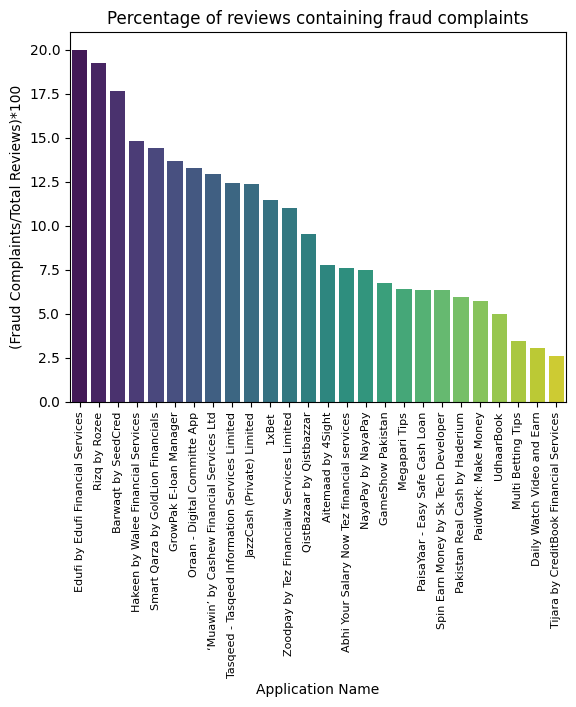

0    com.personale.credit.carry.cash.loan.paisaya
1    com.personale.credit.carry.cash.loan.paisaya
2    com.personale.credit.carry.cash.loan.paisaya
3    com.personale.credit.carry.cash.loan.paisaya
4    com.personale.credit.carry.cash.loan.paisaya
Name: app_id, dtype: object


In [45]:
# We should do a word to vector analysis insead
related_terms = ['fraud', 'scam', 'scamming', 'scammer', 'fraudulent', 'deceit', 'hoax', 'swindle', 'con','Dhoka','Jhoot','worst','bad']

pattern = '|'.join(related_terms)

# Filter the content, find percentages
fraud_scam_df = df2[df2['content'].str.contains(pattern, case=False, na=False)]
percentage_df = (fraud_scam_df['Application Name'].value_counts() / df2['Application Name'].value_counts() * 100).dropna().reset_index()
percentage_df.columns = ['Application Name', 'percentage']
percentage_df = percentage_df.sort_values(by='percentage', ascending=False)



# Plot the percentage against app ID using Seaborn
sns.barplot(data=percentage_df, x='Application Name', y='percentage', palette='viridis')
plt.title('Percentage of reviews containing fraud complaints')
plt.xlabel('Application Name')
plt.ylabel('(Fraud Complaints/Total Reviews)*100')
plt.xticks(fontsize=8,rotation=90) 
plt.show()
print(df2['app_id'].head())






Permission Data Analysis

In [18]:
# pdf=permissions data frame
pdf=pd.read_excel("AppInfoAndPermissions.xlsx")


In [9]:
df2['app_id'].value_counts()

app_id
com.techlogix.mobilinkcustomer                                      179391
com.loan.cash.credit.barwaqt.tez.paisa.jazz.financial.ready.easy     86057
com.zareklamy                                                        29401
com.personale.credit.carry.cash.loan.paisaya                         18303
com.multitips                                                        13978
com.oscarudhaarapp                                                   13734
com.nayapay.app                                                      12816
com.creditcat.tech.app                                               10294
pakistan.real.cash.pakistanrealcash                                   7697
com.creditbookpk.creditbook                                           5932
com.aitemaad.money.credit.cash.easy.loan                              5593
com.zoodel.kz                                                         4497
com.oraan.android                                                     1429
com.abhifinance   

In [10]:
# Cleaning the PlayStore Permissions
pdf['PlayStore_Permissons']=pdf['PlayStore_Permissons'].fillna("{}")
permissions=pdf['PlayStore_Permissons'].apply(eval).apply(pd.Series) # reconvert to dict
pdf=pd.concat([pdf,permissions ], axis=1).drop(columns=['PlayStore_Permissons']) # store in origdataFrame



C:\Users\ML\AppData\Local\Temp\ipykernel_13920\1521936497.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=permissions.count().sort_values(ascending=False).values, y=permissions.count().sort_values(ascending=False).index, palette='bright',orient='h')


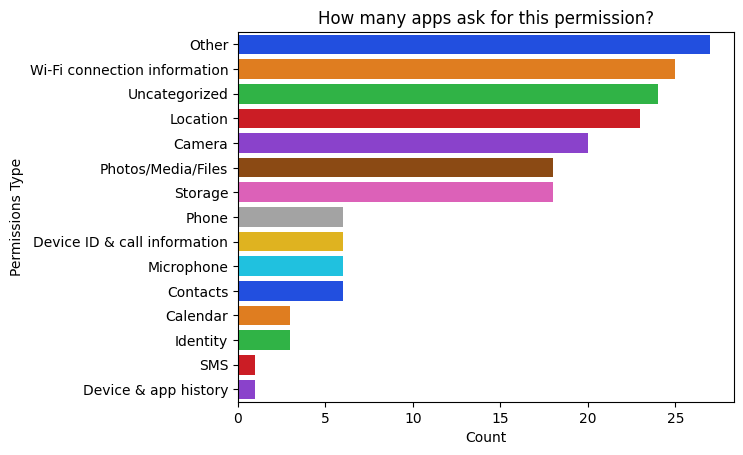

In [46]:
sns.barplot(x=permissions.count().sort_values(ascending=False).values, y=permissions.count().sort_values(ascending=False).index, palette='bright',orient='h')
plt.xlabel('Count')
plt.ylabel('Permissions Type')
plt.title('How many apps ask for this permission?')
plt.show()

In [12]:
# Extracting the information Sectoin Of all The Apps
pdf['PlayStore_Info']=pdf['PlayStore_Info'].fillna("{}")
Info=pdf['PlayStore_Info'].apply(eval).apply(pd.Series) # reconvert to dict


In [13]:
print("Available Addresses: ",Info.developerAddress.dropna().count())
Info[['title','developerAddress']].dropna()


Available Addresses:  9


,title,developerAddress
2,Abhi - Your Salary Now!,"1st Floor, MA Tabba Foundation Building، Gizri..."
4,Barwaqt - Loan Money Cash,"LDA Community Centre, Near Barkat Market Passp..."
8,Abhi - Your Salary Now!,"1st Floor, MA Tabba Foundation Building، Gizri..."
12,Spin Earn Pk - Pak Earn Money,Pakistan Karachi
14,TASDEEQ,"Plaza 8-B, Commercial Area\nPhase 5, DHA\nLaho..."
15,Multi Betting Tips,57000 Türkiye/Sinop\nTürkiye
25,Udhaar Book: Digi Khata & Earn,"2261 Market Street #4214\nSan Francisco CA, 94114"
26,JazzCash - Your Mobile Account,"Jazz Digital Headquarters\nKohistan Road,\nF8 ..."
28,Paidwork: Make Money,"Podzamcze 217,\nLeczna 21-010,\nPoland"


In [14]:
print(Info.privacyPolicy)

0           https://www.paisayaar.pk/h5/privacidad.html
1               https://www.smartqarza.com/privacy.html
2                    https://abhi.com.pk/privacy-policy
3                 https://www.muawin.com/privacy-policy
4     https://h5.barwaqtfintec.com/html/PrivacyPolic...
5     https://www.4sightpk.com/appCommon.html#/proto...
6                   https://hakeem.tech/privacy-policy/
7                                                   NaN
8                    https://abhi.com.pk/privacy-policy
9         https://www.qistbazaar.pk/page/privacy-policy
10    https://growtechsol.com/privacy/eloan_privacy_...
11     https://www.zood.biz/privacy-and-security-policy
12    https://sktech78.blogspot.com/p/privacy-policy...
13           https://www.oraan.com/oraan-privacy-policy
14               https://www.tasdeeq.com/privacypolicy/
15      http://bet.hibatest.com/multi-tips-privacy.html
16    http://www.e-droid.net/privacy.php?ida=271517&...
17    https://soomro4you.blogspot.com/2020/03/pa

Index(['Unnamed: 0', 'Sno', 'Application Name', 'Application Type',
       'Additional Details', 'Package_Name', 'Where we found it',
       'Terms and conditions', 'PlayStore_Info', 'PlayStore_Permissons'],
      dtype='object')

In [15]:
print(Info.icon)

0     https://play-lh.googleusercontent.com/cvgG30QA...
1     https://play-lh.googleusercontent.com/TIRZn7GO...
2     https://play-lh.googleusercontent.com/053_q5Ra...
3     https://play-lh.googleusercontent.com/LdF8TYBQ...
4     https://play-lh.googleusercontent.com/hYdG8uKD...
5     https://play-lh.googleusercontent.com/SgDede9h...
6     https://play-lh.googleusercontent.com/SGSQ8fon...
7                                                   NaN
8     https://play-lh.googleusercontent.com/053_q5Ra...
9     https://play-lh.googleusercontent.com/VyFFePE7...
10    https://play-lh.googleusercontent.com/iZv8l-71...
11    https://play-lh.googleusercontent.com/gDKXI-rA...
12    https://play-lh.googleusercontent.com/m3C81wX4...
13    https://play-lh.googleusercontent.com/J05dCdhK...
14    https://play-lh.googleusercontent.com/wKjY7MQl...
15    https://play-lh.googleusercontent.com/8YkeTaYW...
16    https://play-lh.googleusercontent.com/Ufe6ytqV...
17    https://play-lh.googleusercontent.com/6i_D